<a href="https://colab.research.google.com/github/leesolhahaha/study/blob/main/%EB%AA%A8%EB%8D%B8_%EB%B3%80%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
from scipy.io import wavfile as wav
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa.display
import tensorflow

In [ ]:
import os
import glob
import librosa
import numpy as np
import pandas as pd
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/librosa/display.py:806: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/librosa/display.py:806: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/librosa/display.py:806: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/librosa/display.py:806: UserWarning: Glyph 4467 (\N{HANGUL JUNGSEONG EU}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/librosa/display.py:806: UserWarning: Glyph 4458 (\N{HANGUL JUNGSEONG WA}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/librosa/display.py:806: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current

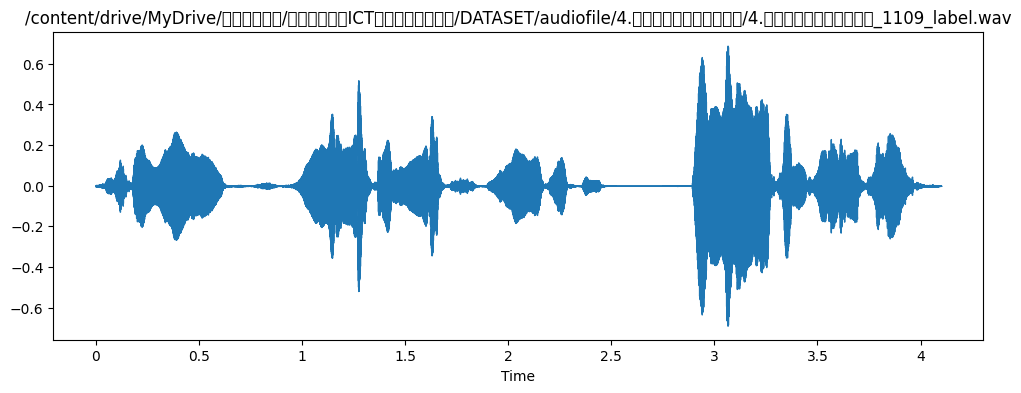

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4527 (\N{HANGUL JONGSEONG RIEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4355 (\N{HANGUL CHOSEONG TIKEUT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


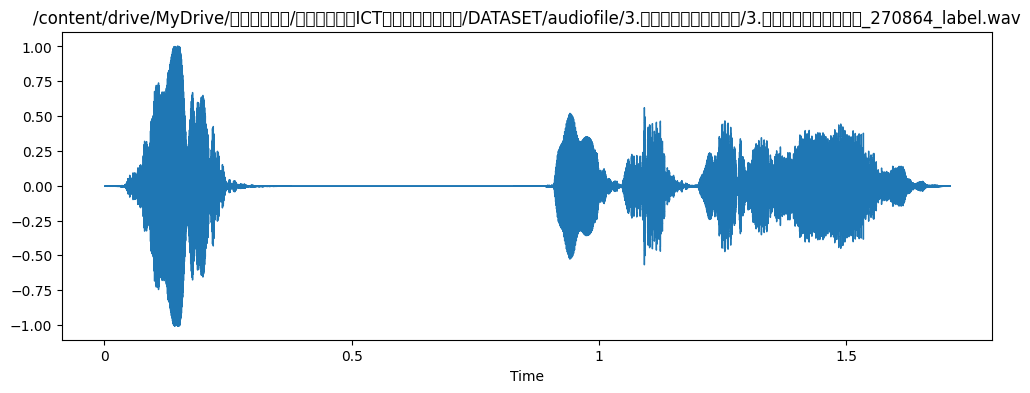

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4461 (\N{HANGUL JUNGSEONG YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4366 (\N{HANGUL CHOSEONG CHIEUCH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


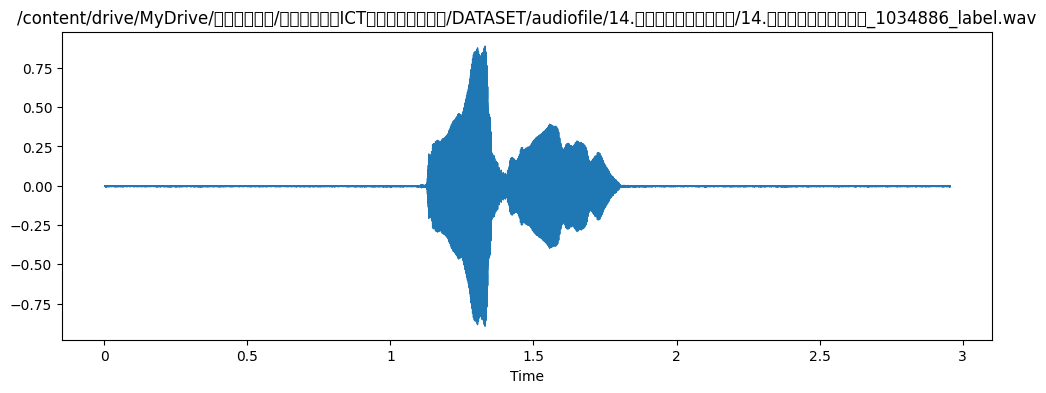

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4454 (\N{HANGUL JUNGSEONG E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4370 (\N{HANGUL CHOSEONG HIEUH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4450 (\N{HANGUL JUNGSEONG AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


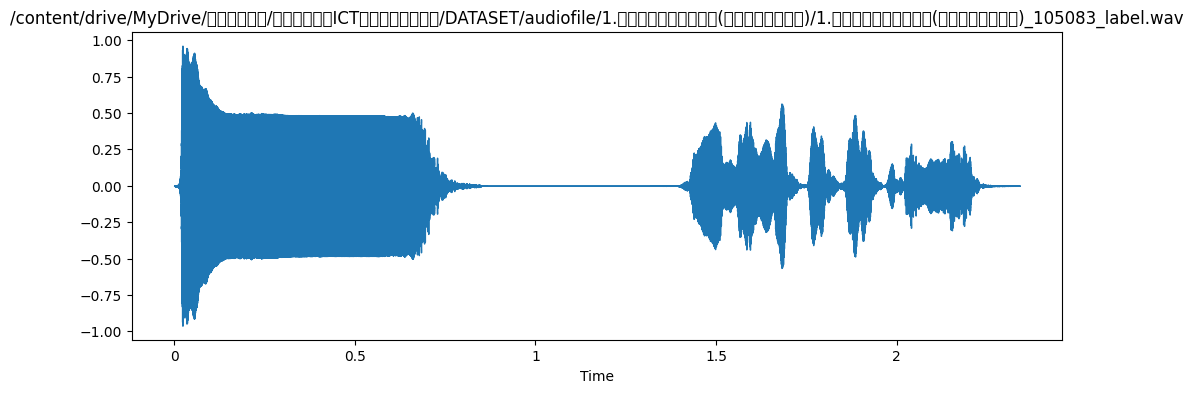

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4526 (\N{HANGUL JONGSEONG TIKEUT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


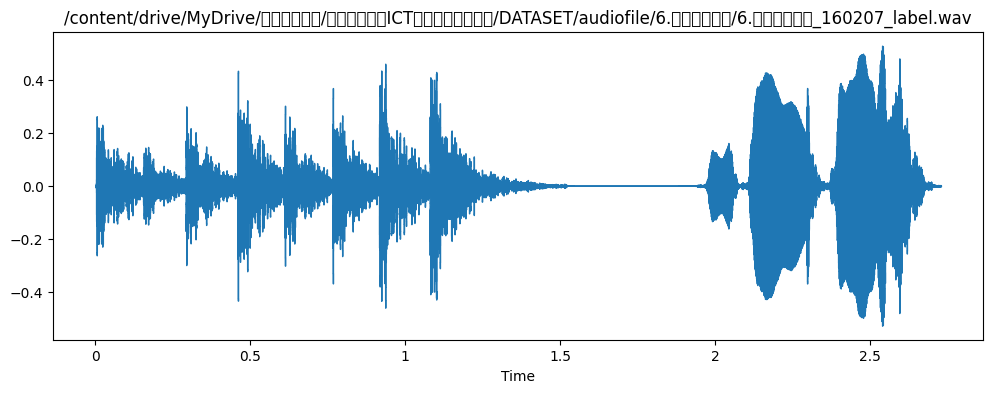

In [ ]:
filename_cry = '/content/drive/MyDrive/이브와/이브와ICT공모전/DATASET/audiofile/4.폭력범죄/4.폭력범죄_1109_label.wav'
filename_laugh = '/content/drive/MyDrive/이브와/이브와ICT공모전/DATASET/audiofile/3.절도범죄/3.절도범죄_270864_label.wav'
filename_noise = '/content/drive/MyDrive/이브와/이브와ICT공모전/DATASET/audiofile/14.도움요청/14.도움요청_1034886_label.wav'
filename_silence = '/content/drive/MyDrive/이브와/이브와ICT공모전/DATASET/audiofile/1.강제추행(성범죄)/1.강제추행(성범죄)_105083_label.wav'
filename_fall = '/content/drive/MyDrive/이브와/이브와ICT공모전/DATASET/audiofile/6.갇힘/6.갇힘_160207_label.wav'

#scream은 비명소리
#fall은 낙상소리

example_list = [filename_cry, filename_laugh, filename_noise, filename_silence, filename_fall]
librosa_sample_rate  = 0


def draw_sound(filename):
    plt.figure(figsize = (12, 4))
    data, librosa_sample_rate  = librosa.load(filename)
    plt.title(filename)
    _ = librosa.display.waveshow(data, sr = librosa_sample_rate )

for i in  example_list:
    draw_sound(i)

In [ ]:
import librosa
from scipy.io import wavfile as wav

import numpy as np

filename = '/content/drive/MyDrive/이브와/이브와ICT공모전/DATASET/audiofile/1.강제추행(성범죄)/1.강제추행(성범죄)_105083_label.wav'

librosa_audio, librosa_sample_rate = librosa.load(filename)
scipy_sample_rate, scipy_audio = wav.read(filename)

print('Original sample rate:', scipy_sample_rate)
print('Librosa sample rate:', librosa_sample_rate)

mfccs = librosa.feature.mfcc(y = librosa_audio, sr = librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

Original sample rate: 44100
Librosa sample rate: 22050
(40, 101)


In [ ]:
!pip install librosa
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import librosa


def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

    pad_width = max_pad_len - mfccs.shape[1]
    if pad_width > 0:  # 패딩이 필요한 경우에만 수행
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:  # pad_width가 음수인 경우에도 패딩 수행
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, abs(pad_width))), mode='constant')

    global max_value  # Use 'max_value' instead of 'max'
    if mfccs.shape[1] > max_value:
        max_value = mfccs.shape[1]

    return mfccs




In [ ]:
import pandas as pd
import os
import librosa
import resampy
import sys


test_num = 0
max_value = 0
max_pad_len = 0

fulldatasetpath = '/content/drive/MyDrive/이브와/이브와ICT공모전/DATASET/audiofile'
metadata = pd.read_csv("/content/drive/MyDrive/엑셀파일/통합/위급통합.csv")
features = []

metadata.reset_index(drop=True, inplace=True)
metadata.index = metadata.index + 1

for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath), str(row["fold"]) + '/', str(row["slice_file_name"]))
    class_label = row['class_name']
    data = extract_features(file_name)
    features.append([data, class_label])

    # 현재 MFCC 배열의 길이 확인
    current_length = data.shape[1]
    # 최대 길이보다 길다면 최대 길이 값을 업데이트
    if current_length > max_pad_len:
        max_pad_len = current_length

print("가장 긴 MFCC 배열의 길이:", max_pad_len)

featuresdf = pd.DataFrame(features, columns=['feature', 'class_label'], index=range(1, len(features) + 1))

print("Finished feature extraction from ", len(featuresdf), ' files')
print('Max :', max_value)


가장 긴 MFCC 배열의 길이: 31198
Finished feature extraction from  8836  files
Max : 31198


In [ ]:
import pandas as pd
import os
import librosa
import resampy
import sys

In [ ]:
featuresdf

,feature,class_label
1,"[[-614.9777, -242.51071, -144.6385, -111.03959...",비명
2,"[[-614.9777, -242.51071, -144.6385, -111.03959...",비명
3,"[[-590.09625, -289.16183, -139.16447, -55.3844...",비명
4,"[[-555.0338, -368.13788, -273.53647, -295.7059...",비명
5,"[[-555.0338, -368.13788, -273.53647, -295.7059...",비명
...,...,...
8832,"[[-201.34692, -238.38164, -320.58893, -337.275...",갇힘
8833,"[[-478.11346, -427.76257, -258.38113, -205.947...",갇힘
8834,"[[-480.07242, -483.48856, -486.68402, -487.473...",갇힘
8835,"[[-481.01758, -489.94022, -400.25964, -270.762...",갇힘


In [ ]:
# 피클로 데이터 저장
featuresdf.to_pickle("/content/drive/MyDrive/데이터셋/new_featuresdf.pkl")

In [ ]:
# 피클 데이터 로드
featuresdf = pd.read_pickle("/content/drive/MyDrive/데이터셋/featu.pkl")

In [ ]:
featuresdf

,feature,class_label
1,"[[-614.9777, -242.51071, -144.6385, -111.03959...",비명
2,"[[-614.9777, -242.51071, -144.6385, -111.03959...",비명
3,"[[-590.09625, -289.16183, -139.16447, -55.3844...",비명
4,"[[-555.0338, -368.13788, -273.53647, -295.7059...",비명
5,"[[-555.0338, -368.13788, -273.53647, -295.7059...",비명
...,...,...
8832,"[[-201.34692, -238.38164, -320.58893, -337.275...",갇힘
8833,"[[-478.11346, -427.76257, -258.38113, -205.947...",갇힘
8834,"[[-480.07242, -483.48856, -486.68402, -487.473...",갇힘
8835,"[[-481.01758, -489.94022, -400.25964, -270.762...",갇힘


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

x = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, yy, test_size = 0.2, random_state = 42)

In [ ]:
num_rows = 13
num_columns = 30227
num_channels = 1

print("train data shape")
print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

print("\ntrain data reshape 결과")
print(x_train.shape)
print(x_test.shape)

train data shape
(7068, 13, 31277)
(1768, 13, 31277)


ValueError: ignored

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Input, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.models import Model

num_rows = 13
num_columns = 30227
num_channels = 1
num_labels = yy.shape[1]

# CNN 모델 구현
input_shape = (num_rows, num_columns, num_channels)

inputs = Input(shape=input_shape)
x = Conv2D(16, kernel_size=2, activation='relu', padding='same')(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Dropout(0.2)(x)

x = Conv2D(32, kernel_size=2, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Dropout(0.2)(x)

x = Conv2D(64, kernel_size=2, activation='relu', padding='same')(x)
x = Dropout(0.2)(x)

x = Conv2D(128, kernel_size=2, activation='relu', padding='same')(x)
x = Dropout(0.2)(x)

x = GlobalAveragePooling2D()(x)
outputs = Dense(num_labels, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 13, 30227, 1)]    0         
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 30227, 16)     80        
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 15113, 16)     0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 6, 15113, 16)      0         
                                                                 
 conv2d_23 (Conv2D)          (None, 6, 15113, 32)      2080      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 3, 7556, 32)      0         
 g2D)                                                        

In [ ]:
hist = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=8,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/30
884/884 [==============================] - 33s 23ms/step - loss: 1.1988 - accuracy: 0.5295 - val_loss: 0.8532 - val_accuracy: 0.7330
Epoch 2/30
884/884 [==============================] - 16s 19ms/step - loss: 0.6944 - accuracy: 0.7670 - val_loss: 0.5733 - val_accuracy: 0.8060
Epoch 3/30
150/884 [====>.........................] - ETA: 12s - loss: 0.5172 - accuracy: 0.8250

KeyboardInterrupt: ignored